# Steady state vertical infiltration
## M Vanclooster 28/02/18

In [1]:
# Miscellaneous operating system interfaces
import os
# Python Data Analysis library
import pandas as pd
# Python Numerical computating library
import numpy as np
# Python Scientifical computing library
import scipy as sc
# Python plotting library
from matplotlib import pyplot as plt

# Allowing plot inside the notebook
%matplotlib inline

In this notebook we analyse steady state infiltration in an unsaturated soil in equilibrium with a shallow groundwater table. The objective is to calculate the pressure head and the soil moisture profile in the soil when it is subjected to a constant steady state infiltration, and when the water table is fixed at a certain deph $z_{water table}$. To facilitate the analysis we put a reference system pointing upwards with its origin situated at water table. This corresponds to the following situation

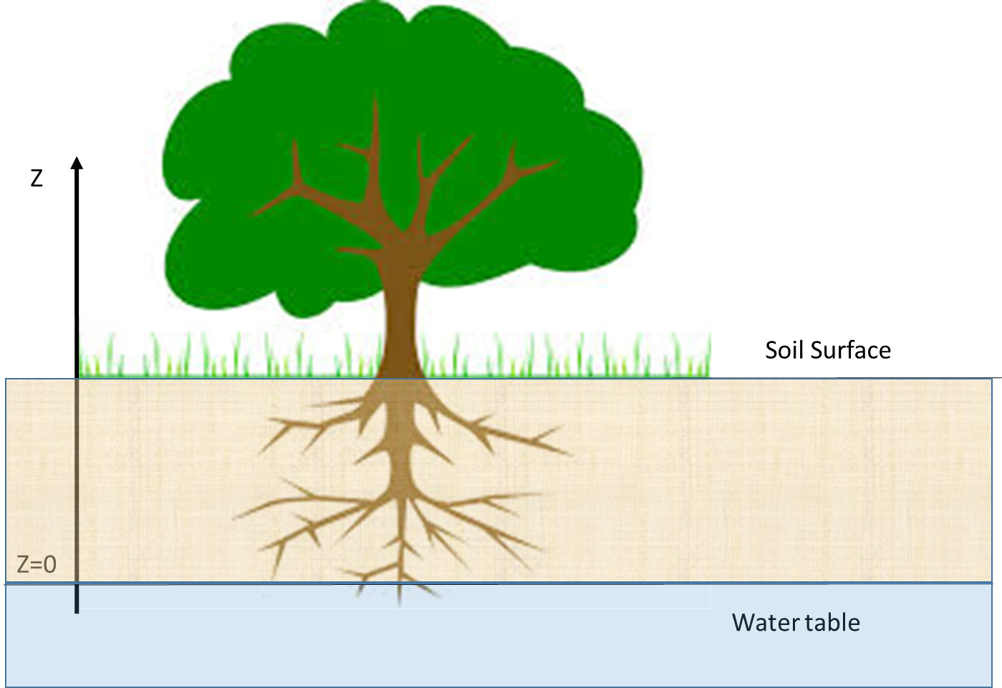

In [2]:
from IPython.display import Image
Image("fig_steady_state_inf.png")

We start by modelling the hydraulic properties of our soil. For the retention curve, we consider the standard retention model. For the conductivity curve, we consider that the unsaturated hydraulic conductivity can be modelled by means of an exponential relationship as follows:

\begin{equation}
    k(h)=k_s exp(c h)
\end{equation}

This corresponds to the famous Gardner hydraulic conductivity model.(cite Gardner). We visualise first these curves for a set of plausible values of $h$ and $\theta$ 

Text(0,0.5,'k (cm/s)')

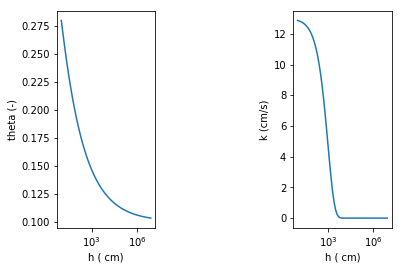

In [3]:
pF=np.arange(1,7,0.1)
h=10**pF
thr = 0.10
ths = 0.4
alfa = 0.5
n = 1.3

th = thr+(ths-thr)/(1+(alfa*h)**n)**(1-1/n)
ks = 13 #Saturated hydraulic conductivity (cm/s)
c = -0.001
k = ks*np.exp(c*h)

plt.subplot(1,3,1)
plt.semilogx(h,th);
plt.xlabel('h ( cm)')
plt.ylabel('theta (-)')
plt.subplot(1,3,3)
plt.semilogx(h,k);
plt.xlabel('h ( cm)')
plt.ylabel('k (cm/s)')

We now implement our simple flow model. Given the fact that the origin of our reference system is at the top of the water table, our total head will be: $H(z)=h(z) + z$. In this case, we can use our Darcy equation to relate flow with head:

\begin{equation}
    J_w(z) = - k(h) \frac{d}{dz} \left(h(z)+z \right)
\end{equation}
<=>
\begin{equation}
    J_w(z) = - k(h) \frac{dh(z)}{dz} - k(h)
\end{equation}

We consider being in steady state conditions; hence $J_w(z)$ will not change in time. Also, the pressure head and the moisture content will not change in time. This implies that $J_w(z)$ is constant in time and depth, or $J_w(z)=J_w$. We can therefore simplify our equation and directly integrate our Darcy equation to obtain information about the spatial evolution of pressure head and water content. Let's first separate the variables:
\begin{equation}
    dz=-\frac{k(h)}{J_w+k(h)}dh(z)
\end{equation}

Subsequently, we inject in this expression our relationship for the unsaturated hydraulic conductivity:

\begin{equation}
    dz=-\frac{k_s exp(c h)}{J_w+k_s exp(c h)}dh(z)
\end{equation}

This is our differential transport equation. If we want to obtain the the pressure head profile $h(z)$, or, equivalently, our soil moisture profile, $\theta(z)$, we need to integrate this differential equation. Remark that we are working in steady state conditions; the flow does no depend on time and hence our flow equation is an ordinary differential equation (and not a partial differential equation). The integration is therefore a spatial integration. If we consider the following boundary: for $z=0$, $h=0$ (at the level of the water table, the soil is completely saturated and consequently $h=0$) and for $z=z'$, $h=h'$, then we can write this spatial integration as follows: 

\begin{equation}
    \int_{0}^{z'} dz=-\int_{0}^{h'} \frac{k_s exp(c h)}{J_w+k_s exp(c h)}dh(z)
\end{equation}

The left hand integration is straightforward. The solution is $z'$. The right hand is a bit more complicated. Therefore, we'll use the symbolic calculator in $Python$ and evaluate this integral with $Sympy$.

In [4]:
from sympy import *
ks_s = Symbol('ks_s')
c_s = Symbol('c_s')
h_s = Symbol('h_s')
Jw_s = Symbol('Jw_s')
hacc_s= Symbol('hacc_s')
y=-ks_s*exp(c_s*h_s)/(Jw_s+ks_s*exp(c_s*h_s))
solution=integrate(y,(h_s,0,hacc_s))
solution

log(Jw_s/ks_s + 1)/c_s - log(Jw_s/ks_s + exp(c_s*hacc_s))/c_s

So the solution of this differential equation is as follows:
    

\begin{equation}
    z'= \frac{1}{c} \ln \left(\frac{J_w + k_s}{J_w+k_s exp(ch')} \right)
\end{equation}

With this close form equation, we can calculate $z'$ as a function of $h'$, or inversely h' as a function of z'.

In [5]:
z_s = Symbol('z_s')
solve(z_s-(1/c_s)*log((Jw_s+ks_s)/(Jw_s+ks_s*exp(c_s*h_s))),h_s)

[log((-Jw_s*exp(c_s*z_s) + Jw_s + ks_s)*exp(-c_s*z_s)/ks_s)/c_s]

Hence the inversion of previous function yields:

\begin{equation}
    h'=\frac{1}{c}ln\left(\frac{(-J_w exp(-c z')+J_w + k_s) exp(-c z')}{k_s}\right)
\end{equation}

Let's evaluate this for a set of reasonable values. Consider $J_w=-1.1 cm / s$ (remember, $ks = 1.3 cm/s$, and an unsaturated layer of 100 cm thickness (hence the water table situates at 100 cm below the soil surface):

Text(0,0.5,'z (cm)')

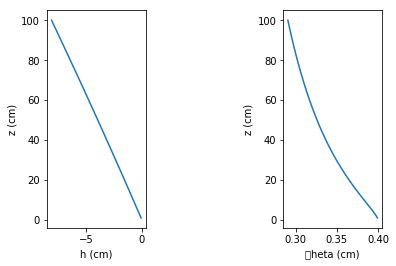

In [9]:
Jw=-12
z=np.arange(1,101,1)
hacc=np.log((-Jw*np.exp(c*z) + Jw + ks)*np.exp(-c*z)/ks)/c
hp=np.abs(hacc)
thacc = thr+(ths-thr)/(1+(alfa*hp)**n)**(1-1/n)

plt.subplot(1,3,1)
plt.plot(hacc,z);
plt.xlabel('h (cm)')
plt.ylabel('z (cm)')

plt.subplot(1,3,3)
plt.plot(thacc,z);
plt.xlabel('\theta (cm)')
plt.ylabel('z (cm)')


We see that the soil is indeed unsaturated; yet its is lightly more saturated as compared to the situation where $J_w=0$ (no flow, or complete equilibrium with the water table). 

Now you can check what will happen if we change $Jw$, the position of the water table or the soil hydraulic paramaters. Please play around with the parameters of this simple flow model and evaluate how how this affects the pressure head profile and the water content in this soil profile.